In [43]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            erros = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                erros += int(update != 0.0)
            self.errors_.append(erros)
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    def activation(self, X):
        return self.net_input(X)

In [45]:
df = pd.read_csv('iris.data', header= None)

df.tail()

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

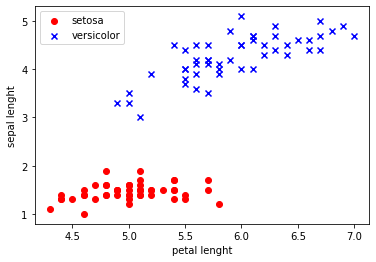

In [46]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal lenght')
plt.ylabel('sepal lenght')
plt.legend(loc='upper left')
plt.show()

In [47]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange (x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

In [48]:
def get_confusion_matrix(y_test, y_pred):
    print(y_test, y_pred)
    reais = y_test
    preditos = y_pred
    labels = [1,-1]

    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0

    return tp, fp, fn, tn

In [49]:
def accuracy(y_test, y_pred):
    tp, fp, fn, tn  = get_confusion_matrix(y_test, y_pred)
    predicoes_corretas = tp + tn
    totas_as_predicoes = tp+fp+fn+tn
    return predicoes_corretas/totas_as_predicoes

In [50]:
def recall(y_test, y_pred):
    tp, _ , fn, _  = get_confusion_matrix(y_test, y_pred)
    return tp/(tp+fn)

In [51]:
def precision(y_test, y_pred):
    tp, fp, fn, tn  = get_confusion_matrix(y_test, y_pred)
    return {'True': tp/tp+fp, 'Negative': tn/tn+fn}

In [52]:
def f1_score(y_test, y_pred):
    precisao = precision(y_test, y_pred)['True']
    recall_ = recall(y_test, y_pred)

    return 2*((precisao*recall_)/(precisao+recall_))

In [53]:
def curva_roc(y_test, y_pred):
    tp, fp, fn, tn  = get_confusion_matrix(y_test, y_pred)
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    return tpr, fpr

In [54]:
ppn = Perceptron()
ppn.fit(X, y)
X_test = df.iloc[101:150, [0, 2]].values
Y_test = df.iloc[101:150, 4].values
Y_test = np.where(Y_test == 'Iris-setosa', -1, 1)

In [55]:
y_pred = ppn.predict(X_test)

In [56]:
# result = np.trapz(curva_roc(Y_test, y_pred))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


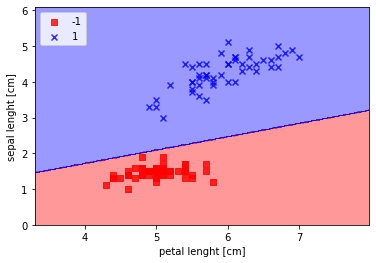

In [57]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('petal lenght [cm]')
plt.ylabel('sepal lenght [cm]')
plt.legend(loc='upper left')
plt.show()

In [58]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

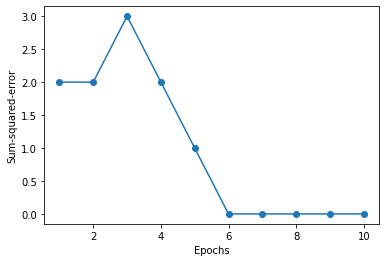

In [59]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()